In [4]:
!pip install -q transformers datasets jiwer torchaudio soundfile matplotlib

In [12]:
from datasets import load_dataset, concatenate_datasets
from transformers import WhisperProcessor, WhisperForConditionalGeneration, TrainingArguments, Trainer
import torch
import shutil
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import Any, Dict, List, Union
from jiwer import wer, cer
import IPython.display as ipd
from tqdm import tqdm
from transformers import WhisperFeatureExtractor, WhisperTokenizer

In [6]:
langs = {
    "English (United States)": "en_us",
    "Hindi (India)": "hi_in",
    "Punjabi (India)": "pa_in",
    "Urdu (Pakistan)": "ur_pk",
    "Bengali (India)": "bn_in",
    "Tamil (India)": "ta_in",
    "Telugu (India)": "te_in",
    "Marathi (India)": "mr_in",
}


fleurs = {
    lang: load_dataset("google/fleurs", config, split="train+validation", trust_remote_code=True)
    for lang, config in langs.items()
}

README.md:   0%|          | 0.00/13.3k [00:00<?, ?B/s]

fleurs.py:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

train.tar.gz:   0%|          | 0.00/1.38G [00:00<?, ?B/s]

dev.tar.gz:   0%|          | 0.00/171M [00:00<?, ?B/s]

test.tar.gz:   0%|          | 0.00/290M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/1.41M [00:00<?, ?B/s]

dev.tsv:   0%|          | 0.00/213k [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/368k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

train.tar.gz:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

dev.tar.gz:   0%|          | 0.00/132M [00:00<?, ?B/s]

test.tar.gz:   0%|          | 0.00/249M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/2.35M [00:00<?, ?B/s]

dev.tsv:   0%|          | 0.00/250k [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/473k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

train.tar.gz:   0%|          | 0.00/1.19G [00:00<?, ?B/s]

dev.tar.gz:   0%|          | 0.00/144M [00:00<?, ?B/s]

test.tar.gz:   0%|          | 0.00/357M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/2.13M [00:00<?, ?B/s]

dev.tsv:   0%|          | 0.00/269k [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/656k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

train.tar.gz:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

dev.tar.gz:   0%|          | 0.00/143M [00:00<?, ?B/s]

test.tar.gz:   0%|          | 0.00/150M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/1.74M [00:00<?, ?B/s]

dev.tsv:   0%|          | 0.00/218k [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/262k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

train.tar.gz:   0%|          | 0.00/2.03G [00:00<?, ?B/s]

dev.tar.gz:   0%|          | 0.00/279M [00:00<?, ?B/s]

test.tar.gz:   0%|          | 0.00/660M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/3.48M [00:00<?, ?B/s]

dev.tsv:   0%|          | 0.00/466k [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/1.09M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

train.tar.gz:   0%|          | 0.00/1.64G [00:00<?, ?B/s]

dev.tar.gz:   0%|          | 0.00/239M [00:00<?, ?B/s]

test.tar.gz:   0%|          | 0.00/407M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/3.25M [00:00<?, ?B/s]

dev.tsv:   0%|          | 0.00/508k [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/846k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

train.tar.gz:   0%|          | 0.00/1.50G [00:00<?, ?B/s]

dev.tar.gz:   0%|          | 0.00/167M [00:00<?, ?B/s]

test.tar.gz:   0%|          | 0.00/270M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

dev.tsv:   0%|          | 0.00/350k [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/566k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

train.tar.gz:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

dev.tar.gz:   0%|          | 0.00/292M [00:00<?, ?B/s]

test.tar.gz:   0%|          | 0.00/720M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/3.85M [00:00<?, ?B/s]

dev.tsv:   0%|          | 0.00/514k [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
 for lang, dataset in fleurs.items():
    sample = dataset[1]
    
    print(f"Language: {lang.upper()}")
    print(f"Ground truth transcription: {sample['transcription']}\n")
    
    ipd.display(ipd.Audio(sample["audio"]["array"], rate=sample["audio"]["sampling_rate"]))
    print("-" * 60)

In [8]:
full_dataset = concatenate_datasets([fleurs[lang] for lang in langs])

In [9]:
model_name = "openai/whisper-small"
processor = WhisperProcessor.from_pretrained(model_name)

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

In [10]:
def preprocess(batch):
    audio = batch["audio"]

    batch["input_features"] = processor.feature_extractor(
        audio["array"], sampling_rate=audio["sampling_rate"]
    )["input_features"][0]

    batch["labels"] = processor.tokenizer(
        batch["transcription"], 
        max_length=448,
        truncation=True,
        return_tensors="pt"
    ).input_ids[0]

    return batch

In [13]:
full_dataset = full_dataset.map(preprocess)

Map:   0%|          | 0/22382 [00:00<?, ? examples/s]

In [14]:
full_dataset  

Dataset({
    features: ['id', 'num_samples', 'path', 'audio', 'transcription', 'raw_transcription', 'gender', 'lang_id', 'language', 'lang_group_id', 'input_features', 'labels'],
    num_rows: 22382
})

In [15]:
full_dataset = full_dataset.train_test_split(test_size=0.1)
train_dataset = full_dataset["train"]
test_dataset = full_dataset["test"]

In [16]:
@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: WhisperProcessor

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_features": f["input_features"]} for f in features]
        label_features = [{"input_ids": f["labels"]} for f in features]

        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")

        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        batch["labels"] = labels
        return batch

In [17]:
data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [19]:
model = WhisperForConditionalGeneration.from_pretrained(model_name)

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

In [20]:
model.to(device)

WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(80, 768, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(768, 768, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 768)
      (layers): ModuleList(
        (0-11): 12 x WhisperEncoderLayer(
          (self_attn): WhisperSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=False)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
        

In [21]:
training_args = TrainingArguments(
    output_dir="./whisper-finetuned",
    per_device_train_batch_size=2,
    evaluation_strategy="no",
    num_train_epochs=3,  
    fp16=torch.cuda.is_available(),
    save_strategy="no",
    logging_steps=20,
    report_to="none",
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [22]:
def compute_metrics(pred):
    pred_ids = pred.predictions
    label_ids = pred.label_ids

    pred_str = processor.tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    label_ids[label_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.tokenizer.batch_decode(label_ids, skip_special_tokens=True)

    return {"wer": wer(label_str, pred_str)}

In [23]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=processor.feature_extractor,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)


<ipython-input-23-0587798be21a>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [24]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


TrainOutput(global_step=15108, training_loss=0.17403310914897463, metrics={'train_runtime': 29899.3091, 'train_samples_per_second': 2.021, 'train_steps_per_second': 0.505, 'total_flos': 1.743892715593728e+19, 'train_loss': 0.17403310914897463, 'epoch': 3.0})

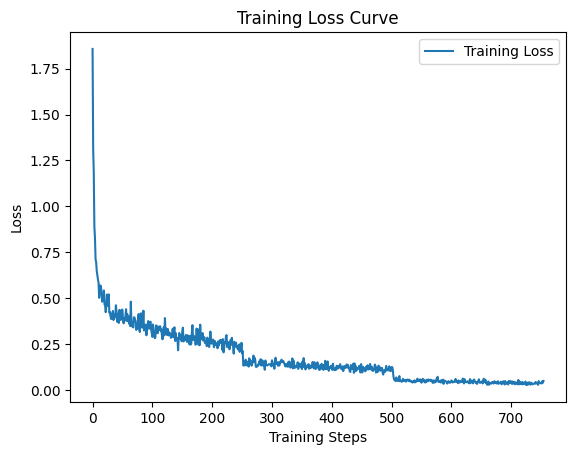

In [25]:
losses = [log["loss"] for log in trainer.state.log_history if "loss" in log]
steps = list(range(len(losses)))

plt.plot(steps, losses, label="Training Loss")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

In [26]:
trainer.save_model("/kaggle/working/whisper-finetuned-model")  

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:2817: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 6585, 6647, 7273, 9061, 9383, 10428, 10929, 11938, 12033, 12331, 12562, 13793, 14157, 14635, 15265, 15618, 16553, 16604, 18362, 18956, 20075, 21675, 22520, 26130, 26161, 26435, 28279, 29464, 31650, 32302, 32470, 36865, 42863, 47425, 49870, 50254, 50258, 50360, 50361, 50362], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


In [27]:
processor.save_pretrained("/kaggle/working/whisper-finetuned-processor")

[]

In [28]:
shutil.make_archive("/kaggle/working/whisper-finetuned-model", 'zip', "/kaggle/working/whisper-finetuned-model")

'/kaggle/working/whisper-finetuned-model.zip'

In [29]:
shutil.make_archive("/kaggle/working/whisper-finetuned-processor", 'zip', "/kaggle/working/whisper-finetuned-processor")

'/kaggle/working/whisper-finetuned-processor.zip'

In [30]:
from tqdm import tqdm

In [31]:
from jiwer import wer, cer

In [32]:

preds = []
refs = []

model.eval()

for sample in tqdm(test_dataset):
    with torch.no_grad():
        inputs = processor(
            sample["audio"]["array"],
            sampling_rate=16000,
            return_tensors="pt"
        ).to(model.device)

        input_features = inputs.input_features
        if input_features.shape[-1] < 3000:
            pad_size = 3000 - input_features.shape[-1]
            input_features = torch.nn.functional.pad(input_features, (0, pad_size))

        predicted_ids = model.generate(input_features=input_features, max_length=225)
        transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0].lower().strip()
        reference = sample["transcription"].lower().strip()

        preds.append(transcription)
        refs.append(reference)




  0%|          | 0/2239 [00:00<?, ?it/s]Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
100%|██████████| 2239/2239 [1:21:32<00:00,  2.19s/it]


In [33]:
print("WER:", wer(refs, preds))
print("CER:", cer(refs, preds))

WER: 0.26764841841114706
CER: 0.12656144226315602


In [34]:
orig_model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small")  # or "base", "medium", etc.
orig_processor = WhisperProcessor.from_pretrained("openai/whisper-small")

orig_model.to("cuda")
orig_model.eval()

WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(80, 768, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(768, 768, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 768)
      (layers): ModuleList(
        (0-11): 12 x WhisperEncoderLayer(
          (self_attn): WhisperSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=False)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
        

In [35]:
preds_orig = []
refs_orig = []
orig_model.eval()
for sample in tqdm(test_dataset.select(range(50)), desc="Original Whisper"):
    with torch.no_grad():
        inputs = orig_processor(
            sample["audio"]["array"],
            sampling_rate=16000,
            return_tensors="pt"
        ).to(orig_model.device)

        input_features = inputs.input_features
        if input_features.shape[-1] < 3000:
            pad_size = 3000 - input_features.shape[-1]
            input_features = torch.nn.functional.pad(input_features, (0, pad_size))

        predicted_ids = orig_model.generate(input_features=input_features, max_length=225)
        transcription = orig_processor.batch_decode(predicted_ids, skip_special_tokens=True)[0].lower().strip()
        reference = sample["transcription"].lower().strip()

        preds_orig.append(transcription)
        refs_orig.append(reference)

Original Whisper: 100%|██████████| 50/50 [01:54<00:00,  2.28s/it]


In [36]:
print("\n Original Whisper Model:")
print("WER:", wer(refs_orig, preds_orig))
print("CER:", cer(refs_orig, preds_orig))


 Original Whisper Model:
WER: 1.0514631685166498
CER: 0.6479160137887809


In [37]:
from jiwer import wer, cer
import matplotlib.pyplot as plt

wer_orig = wer(refs_orig, preds_orig)
cer_orig = cer(refs_orig, preds_orig)

wer_finetuned = wer(refs, preds)
cer_finetuned = cer(refs, preds)


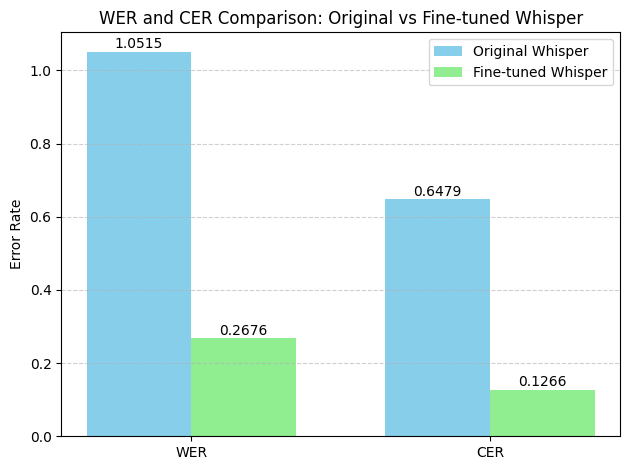

In [38]:
labels = ['WER', 'CER']
original = [wer_orig, cer_orig]
finetuned = [wer_finetuned, cer_finetuned]

x = range(len(labels))
width = 0.35  

fig, ax = plt.subplots()
ax.bar([i - width/2 for i in x], original, width, label='Original Whisper', color='skyblue')
ax.bar([i + width/2 for i in x], finetuned, width, label='Fine-tuned Whisper', color='lightgreen')

ax.set_ylabel('Error Rate')
ax.set_title('WER and CER Comparison: Original vs Fine-tuned Whisper')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

for i, val in enumerate(original):
    ax.text(i - width/2, val + 0.01, f"{val:.4f}", ha='center')
for i, val in enumerate(finetuned):
    ax.text(i + width/2, val + 0.01, f"{val:.4f}", ha='center')

plt.tight_layout()
plt.show()


In [44]:
model.eval()

WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(80, 768, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(768, 768, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 768)
      (layers): ModuleList(
        (0-11): 12 x WhisperEncoderLayer(
          (self_attn): WhisperSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=False)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
        

In [54]:
import random
import IPython.display as ipd
import torch
from transformers import WhisperProcessor, WhisperForConditionalGeneration

def test_random_audio_live(dataset, model, processor, num_samples=10):
    device = model.device  
    model.eval()

    orig_processor = WhisperProcessor.from_pretrained("openai/whisper-small")
    orig_model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small").to(device)
    orig_model.eval()

    for i in range(num_samples):
        sample = random.choice(dataset)
        audio_array = sample["audio"]["array"]
        sampling_rate = sample["audio"]["sampling_rate"]
        true_transcript = sample["transcription"]
        print("Audio ",i+1)
        ipd.display(ipd.Audio(audio_array, rate=sampling_rate))        
        print(f"True Transcription: {true_transcript}")
       

        def _transcribe(audio_arr, processor, model):
            inputs = processor(
                audio_arr,
                sampling_rate=16000,
                return_tensors="pt"
            ).input_features.to(device)
            
            if inputs.shape[-1] < 3000:
                inputs = torch.nn.functional.pad(inputs, (0, 3000 - inputs.shape[-1]))
            
            with torch.no_grad():
                predicted_ids = model.generate(inputs, max_length=225)
            
            return processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]

        ft_trans = _transcribe(audio_array, processor, model)
        orig_trans = _transcribe(audio_array, orig_processor, orig_model)

        print(f"\nOriginal Whisper: {orig_trans}")
        print()
        print(f"Fine-tuned Model: {ft_trans}")
        print("="*100)

test_random_audio_live(test_dataset, model, processor)

Audio  1


True Transcription: சிந்து சமவெளி நாகரிகம் என்பது வடமேற்கு இந்தியத் துணைக் கண்டத்தில் ஒரு வெண்கல யுக நாகரிகமாக இருந்துள்ளதுடன் இது நவீனகால பாகிஸ்தானின் பெரும்பகுதியையும் வடமேற்கு இந்தியா மற்றும் வடகிழக்கு ஆப்கானிஸ்தானில் சில பகுதிகளையும் உள்ளடக்கியது

Original Whisper:  சிந்து சம்மேவேலி நாகரிகம் என்பது வடமேட்கு இந்தியத் துணைக் கண்டத்தில் ஒரு வென்கல யுகனாகரிகமாக இருந்துள்ளது, இது நவீனகால பாகிஸ்டானி பெரும் பகுதியான வடமேட்கு இந்தியா மற்சும் வடக்கிலக்கு அவ்கானிஸ்டானில் சில பகுதிகளையும் உள்ளடக்கிறது.

Fine-tuned Model: சிந்து சமவெளி நாகரிகம் என்பது வடமேற்கு இந்தியத் துணைக் கண்டத்தில் ஒரு வெண்கல யுக நாகரிகமாக இருந்துள்ளதுடன் இது நவீன கால பாகிஸ்தானில் பெரும் பகுதியான வடமேற்கு இந்தியா மற்றும் வடக்கிழக்கு ஆப்கானிஸ்தானில் சில பகுதிகளையும் உள்ளடக்கியது
Audio  2


True Transcription: संक्रामक बीमारी वह बीमारी है जो आस-पास के संक्रमित व्यक्ति द्वारा आसानी से फैलती है

Original Whisper:  संक्रमद बिमारी वह बिमारी है, जो आस पास के संक्रमद विक्ति दुरा आसानी से फ्यालती है.

Fine-tuned Model: संक्रमक बीमारी वह बीमारी है जो आसपास के संक्रमित व्यक्ति द्वारा आसानी से फैलती है
Audio  3


True Transcription: সিম্পসনস এর আগে সায়মন বেশ কয়েকটি অনুষ্ঠানে বিভিন্ন পদে কাজ করেন

Original Whisper:  Simson's కారికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికికి�

Fine-tuned Model: সিম্পসনস এ রাগের সায়মন বেশ কয়েকটি অনুষ্ঠানের বিভিন্ন পদে কাজ করেন
Audio  4


True Transcription: গালাপাগোসের সাইট এবং বন্যজীবন সবথেকে ভালো নৌকায় করে দেখা যায় ঠিক যেমন 1835 সালে চার্লস ডারউইন করেছিলেন

Original Whisper:  វ្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្្�

Fine-tuned Model: গালাপাগোসের সাইট এবং বন্যজীবন শক্তে ভালো নৌকায় করে দেখা যায় ঠিক যেমন 835 সালে চার্লস ডারলই করেছেলেন
Audio  5


True Transcription: in all cases you must book by phone directly with the airline

Original Whisper:  In all cases you must book by phone directly with the airline.

Fine-tuned Model: in all cases you must book by phone directly with the airline
Audio  6


True Transcription: برازیل زمین پر سب سے بڑا رومن کیتھولک ملک ہے اور رومن کیتھولک چرچ نے مستقل طور پر ملک میں ہم جنس شادی کو قانونی حیثیت دینے کی مخالفت کی ہے

Original Whisper:  ब्राजेल जमीन पर सब से बड़ा रोमन कित्फालिक मुल्क है और रोमन कित्फालिक चर्च ने वुस्तकल तोर पर मुल्क में हम जिन स्थादिको कानुनी हैसे देने के मुखाल्फत की है

Fine-tuned Model: برازیل زمین پر سب سے بڑا رومن کیتھولک ملک ہے اور رومن کیتھولک چرچ نے مستقل طور پر ملک میں ہم جنس شادی کو قانونی حیثیت دینے کی مخالفت کی ہے
Audio  7


True Transcription: اواہو میں ایک گیج کی پیمائش کرنے پر 6.34 انچ تک پہنچنے والی بارش کو فائدہ مند بتایا گیا تھا

Original Whisper:  ایک گیج کی پیمائش کرنے پر 6 شریا 3-4 انچ تک پوشنے ہوا لے بارش کو فیضہ من بتایا گیا تھا

Fine-tuned Model: گزو میں ایک گیج کی پہمائش کرنے پر 6.34 انچ تک پہنچنے والے بارش کو فائدہ مند بتایا گیا تھا
Audio  8


True Transcription: ব্যাণ্ডটি মইয়ের ওয়ার মেমোরিয়াল স্ট্যাডিয়াম যেটা 9000 লোক এর উপস্থিতির জন্য তৈরি ছিল সেটার প্রদর্শনীটি বাতিল করেছিল এবং ভক্তদের কাছে ক্ষমা চেয়েছিল

Original Whisper:  ब्राम्ती मोई वार्ग मेमर्रियाल इस्टर्याम, जे ता नायाजर लोगे उपुष्ति जोन्नो तोरी चिलो, शे ता पदशुन्टी बातिल को ले चिलो एबं भख्तुदर का से खमा चे चिलो.

Fine-tuned Model: ব্রামটি মোয়ের ওয়ার্ক মেমোরিয়াল স্ট্যাডিয়াম যেটা 9,000 লোকের উপস্থিতির জন্য তৈরিত ছিল সেটার প্রদর্শনটি বাতিল কর
Audio  9


True Transcription: "सामन्यानंतर किंग ऑफ क्ले म्हणाला "मी सर्वांत महत्त्वाच्या स्पर्धेच्या अखेरच्या फेरीमध्ये परत आल्याबद्दल उत्साही आहे. मी इथे जिंकण्याचा प्रयत्न करण्यासाठी आलो आहे.""

Original Whisper:  अपने नन्तर किंग अफ कर ले मना ले मी सरवात महत्वाज़ सब अखेर चा फेरी मदे परद आलया बदल उच्साही आए मी इते जिंकनाचा परयतना करना सकी आलोवा है

Fine-tuned Model: सामन्यानंतर किंग ऑफ करले म्हणाले मी सर्वात महत्त्वच्या स्पर्धेत आखेरच्या फेरीमध्ये परत आल्याबद्दल उत्साही आहे मी इथे जिंकण्याच्या प्रयत्न करण्यासाठी आलो आहे
Audio  10


True Transcription: 2008 के 400 सबसे अमीर अमेरिकियों की सूची में बैटन को $ 2.3 billion की अनुमानित संपत्ति के साथ 190 वें स्थान पर रखा गया था।

Original Whisper:  तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो तो त

Fine-tuned Model: 2008 के 400 सबसे अमीर अमेरिकियों की सूची में बैटन को 2.3 बिलियन की अनुमानिक संपत्ति के साथ 190वें स्थान पर रखा गया था
